
# Here we will divide the number of Passengers into groups according to years and months

<img src=https://imgrosetta.mynet.com.tr/file/16057618/16057618-728xauto.jpg width='600'>

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('air-traffic-passenger-statistics.csv')

In [3]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [4]:
df.shape

(18885, 12)

In [5]:
df.columns

Index(['Activity Period', 'Operating Airline', 'Operating Airline IATA Code',
       'Published Airline', 'Published Airline IATA Code', 'GEO Summary',
       'GEO Region', 'Activity Type Code', 'Price Category Code', 'Terminal',
       'Boarding Area', 'Passenger Count'],
      dtype='object')

In [6]:
x=df[['Activity Period','Passenger Count']]

In [7]:
x.head()

,Activity Period,Passenger Count
0,200507,27271
1,200507,29131
2,200507,5415
3,200507,35156
4,200507,34090


In [8]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Activity Period  18885 non-null  int64
 1   Passenger Count  18885 non-null  int64
dtypes: int64(2)
memory usage: 295.2 KB


In [9]:
#pip install yellowbrick

In [10]:
from yellowbrick.cluster import KElbowVisualizer

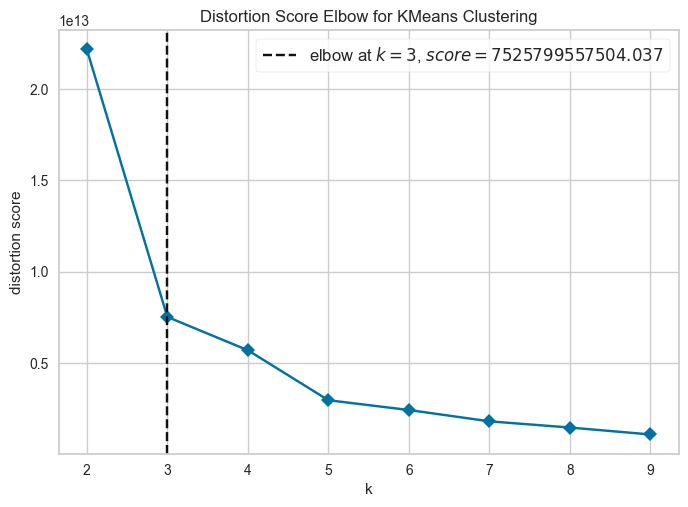

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)

visualizer = KElbowVisualizer(model, k=(2,10), metric='distortion', timings=False)

visualizer.fit(x)  
visualizer.show()

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [13]:
model=KMeans(4)

In [14]:
model.fit(x)

KMeans(n_clusters=4)

In [15]:
model=model.fit(x)

In [16]:
tahmin=model.predict(x)

In [17]:
tahmin

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [18]:
x.head()

,Activity Period,Passenger Count
0,200507,27271
1,200507,29131
2,200507,5415
3,200507,35156
4,200507,34090


In [19]:
x['cluster']=tahmin

In [20]:
x.head()

,Activity Period,Passenger Count,cluster
0,200507,27271,0
1,200507,29131,0
2,200507,5415,0
3,200507,35156,0
4,200507,34090,0


In [21]:
silhouette_score(x,tahmin)

0.7867897597333406

In [22]:
# wccs= withhin cluster sum of squares
wcss=[]
ss=[]
for i in range(2,10):
    model=KMeans(i)
    model=model.fit(x)
    tahmin=model.predict(x)
    ss1=silhouette_score(x,tahmin)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)

0.8594457335085237
0.8282309396682337
0.7852109841576796
0.660434429685034
0.662259809896163
0.6454755495584337
0.652034494202787
0.6097599055714527


In [23]:

x['Activity Period'] = x['Activity Period'].astype(str)


x['Year'] = x['Activity Period'].str[:4]
x['Month'] = x['Activity Period'].str[4:]

In [24]:
x.drop("Activity Period", axis=1, inplace=True)

In [25]:
x

,Passenger Count,cluster,Year,Month
0,27271,0,2005,07
1,29131,0,2005,07
2,5415,0,2005,07
3,35156,0,2005,07
4,34090,0,2005,07
...,...,...,...,...
18880,50,0,2018,06
18881,10868,0,2018,06
18882,11664,0,2018,06
18883,804,0,2018,06


In [26]:
import matplotlib.pyplot as plt

In [27]:
import seaborn as sns

<Axes: xlabel='cluster', ylabel='count'>

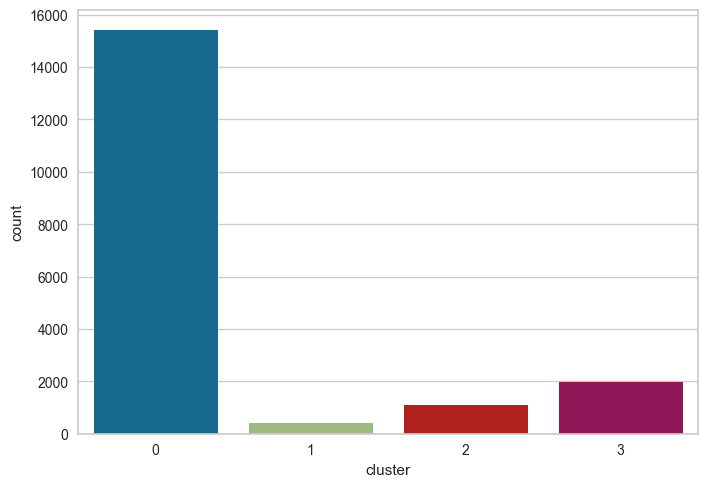

In [32]:
sns.countplot(x=x['cluster'])

In [33]:
df['Activity Period'] = pd.to_numeric(df['Activity Period'])


df['Year'] = df['Activity Period'] // 100
df['Month'] = df['Activity Period'] % 100


df_interpolated = df.interpolate()


In [34]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,2005,7
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,2005,7
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,2005,7
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,2005,7
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,2005,7


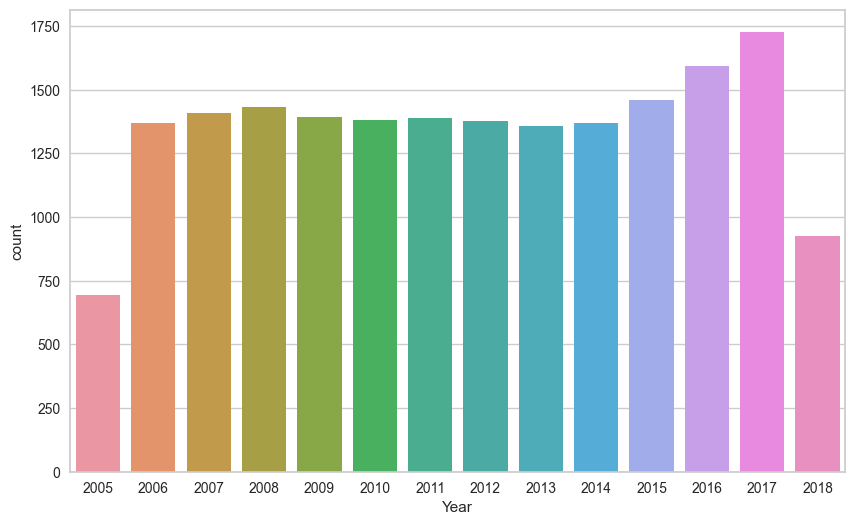

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Year'])
plt.show()

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [37]:
data=linkage(x, method='ward', metric='euclidean')

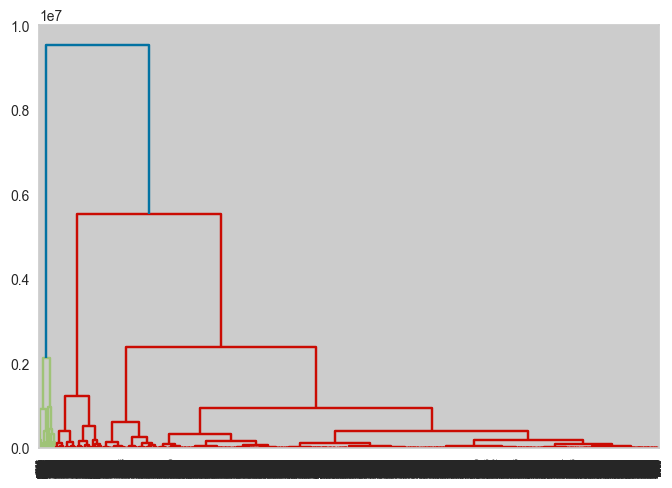

In [38]:
dendrogram(data);